In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.datasets import make_blobs
import umap.umap_ as umap
from seirsplus.models import *
from seirsplus.networks import *
import statistics
import seir
import statistics

In [7]:
g1  = seir.generate_scale_free_graph(10000,min_degree=2,mean_degree=20,gamma=0.2)

In [8]:
def plot_degree_dist(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color="b")

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #plt.xlim(1, max(deg))
    #plt.ylim(1, max(cnt))
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)
    plt.show()
    return deg,cnt

In [40]:
def ipfnB(G1,s=10000,e=1,i=1):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002
    
    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    E=s*e/100
    I=s*i/100
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = E, initI = I)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic()
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    
    return [m,d,tot,tplval,npl, mean, stdev],p

In [10]:
def calc_euclid(x,y):
    dist = sum((x-y)**2)

    return dist

In [11]:
g1 = nx.Graph(g1)

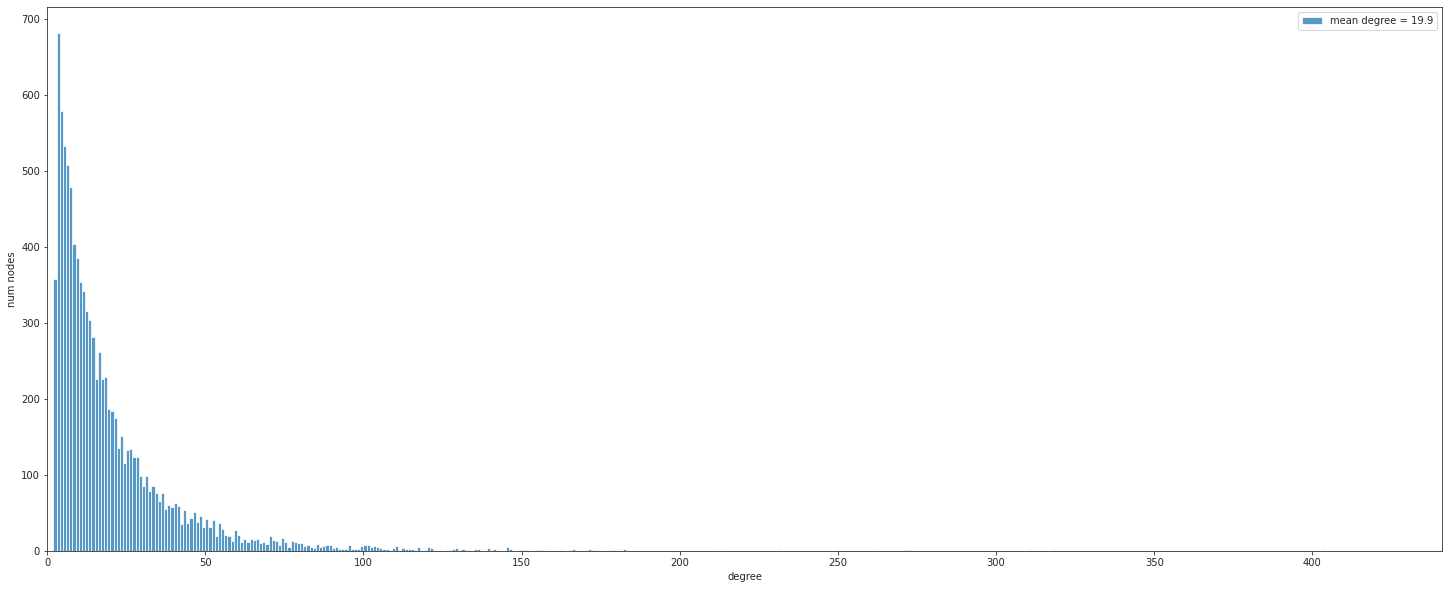

In [12]:
plot_degree_distn(g1)

In [13]:
print(g1.number_of_edges())

99507


In [94]:
pos = nx.random_layout(g2)

In [95]:
data=[]
for i in range(len(pos)):
    data.append(pos[i].tolist())
data = np.asarray(data)


In [13]:
x_max = data[0][0]
x_min = data[0][0]
y_max = data[0][1]
y_min = data[0][1]
for k in data:
    if(k[0] > x_max):
        x_max=k[0]
    if(k[0] < x_min):
        x_min=k[0]
    if(k[1] > y_max):
        y_max=k[1]
    if(k[1] < y_min):
        y_min=k[1]

print('X_min, X_max, y_min, y_max')
print([[x_min,x_max],[y_min,y_max]])    

X_min, X_max, y_min, y_max
[[2.8494518119259737e-05, 0.9999142289161682], [0.0001714082609396428, 0.9998771548271179]]


In [14]:
distance_list=[]
for i in range(len(data)):
    diff = calc_euclid(data[3915],data[i])
    distance_list.append(diff)    

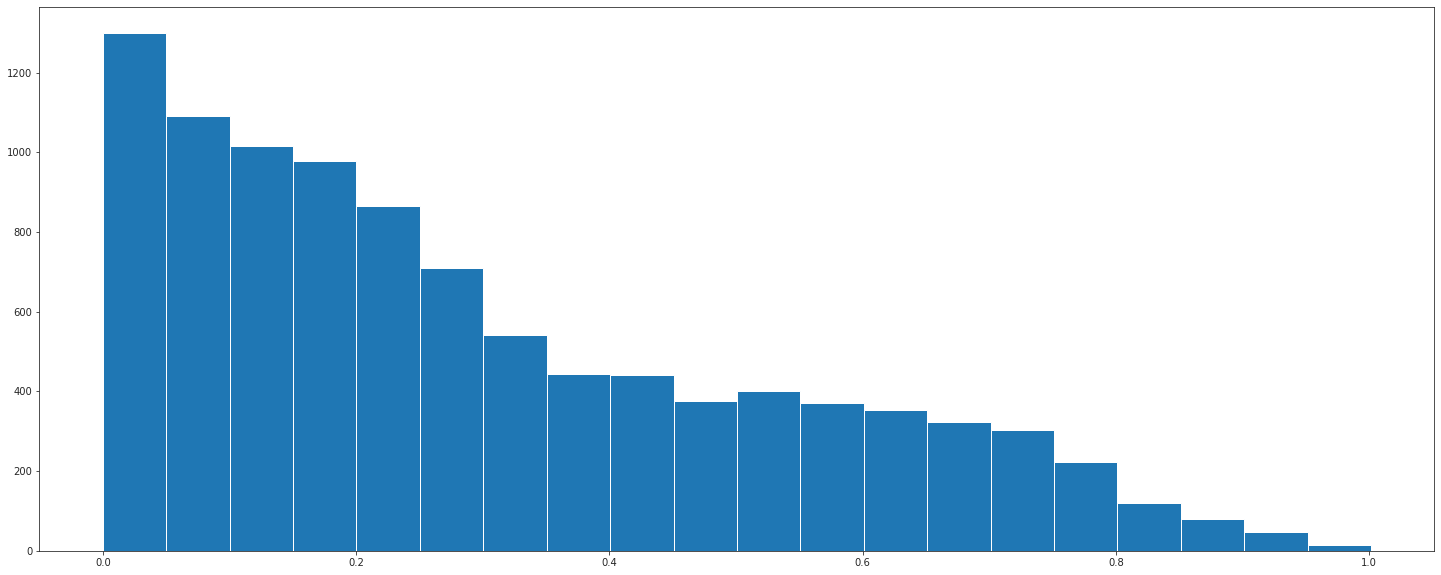

In [15]:
hist1 = plt.hist(distance_list, bins = 20)

t = 0.00
t = 10.05
t = 20.02
t = 30.01
t = 40.01
t = 50.00
t = 60.01
t = 70.01
t = 80.01
t = 90.01
t = 100.00
t = 110.00
t = 120.00
t = 130.01
t = 140.01
t = 150.00
t = 160.00
t = 170.01
t = 180.01
t = 190.03
t = 200.01
t = 210.00
t = 220.01
t = 230.02
t = 240.02
t = 250.01
t = 260.06
t = 270.04
t = 280.05
t = 290.07
t = 300.01


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


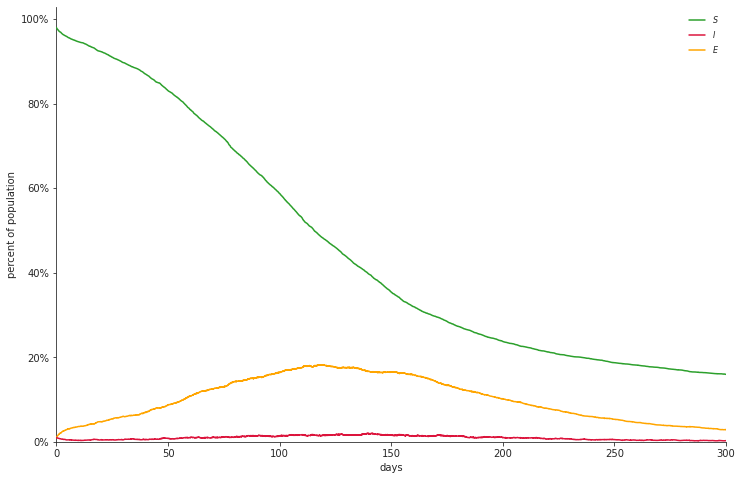

In [16]:
ofir_res = ipfnB(g1,s=1000)

In [17]:
ofir_res

[0.0203,
 141.31416707423995,
 0.8404,
 289.1377519868604,
 [133.14633383022093, 143.44600107645059],
 0.011733023523605857,
 0.0043902506448113745]

### Location Approach 1: K neighbors

In [33]:
#Sort Key
def mykey(x):
    return(x[0])

In [34]:
deg = g1.degree()

In [8]:
deg

DegreeView({0: 3, 1: 49, 2: 11, 3: 18, 4: 2, 5: 7, 6: 13, 7: 3, 8: 7, 9: 28, 10: 24, 11: 37, 12: 9, 13: 5, 14: 15, 15: 19, 16: 10, 17: 6, 18: 12, 19: 4, 20: 12, 21: 5, 22: 11, 23: 7, 24: 15, 25: 14, 26: 18, 27: 16, 28: 5, 29: 26, 30: 64, 31: 11, 32: 12, 33: 34, 34: 34, 35: 16, 36: 8, 37: 3, 38: 3, 39: 28, 40: 6, 41: 46, 42: 16, 43: 13, 44: 5, 45: 27, 46: 9, 47: 43, 48: 2, 49: 24, 50: 11, 51: 19, 52: 4, 53: 7, 54: 17, 55: 23, 56: 15, 57: 16, 58: 22, 59: 23, 60: 6, 61: 11, 62: 14, 63: 5, 64: 18, 65: 21, 66: 6, 67: 8, 68: 91, 69: 4, 70: 4, 71: 11, 72: 22, 73: 6, 74: 16, 75: 25, 76: 22, 77: 68, 78: 19, 79: 50, 80: 12, 81: 13, 82: 17, 83: 57, 84: 6, 85: 3, 86: 18, 87: 40, 88: 12, 89: 173, 90: 12, 91: 4, 92: 28, 93: 34, 94: 2, 95: 8, 96: 6, 97: 38, 98: 21, 99: 22, 100: 7, 101: 36, 102: 7, 103: 4, 104: 4, 105: 4, 106: 22, 107: 28, 108: 42, 109: 11, 110: 45, 111: 18, 112: 12, 113: 8, 114: 27, 115: 20, 116: 25, 117: 98, 118: 4, 119: 14, 120: 29, 121: 16, 122: 7, 123: 36, 124: 11, 125: 9, 126: 9

In [73]:
s = 10000
data1,y1 = make_blobs(n_samples=s,n_features=2,cluster_std=3)

In [36]:
x_max = data1[0][0]
x_min = data1[0][0]
y_max = data1[0][1]
y_min = data1[0][1]
for k in data1:
    if(k[0] > x_max):
        x_max=k[0]
    if(k[0] < x_min):
        x_min=k[0]
    if(k[1] > y_max):
        y_max=k[1]
    if(k[1] < y_min):
        y_min=k[1]

print('X_min, X_max, y_min, y_max')
print([[x_min,x_max],[y_min,y_max]])    

X_min, X_max, y_min, y_max
[[0.13457337580233886, 0.927138109138055], [0.1344018151803823, 0.881001992863958]]


In [37]:
print(g1.number_of_edges())
print(G_k.number_of_edges())

99485


NameError: name 'G_k' is not defined

In [18]:
dlist=[]
for j in range(len(data1)):
    diff = calc_euclid(data1[5],data1[j])
    dlist.append([diff,j])
dlist.sort(key=mykey)
dlist[1][1]

8891

In [74]:
G_k=nx.Graph()
G_k.add_nodes_from(range(10000))
for i in range(len(data1)):
    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    for k in range(deg[i]):
        edgelist.append((i,dlist[k+1][1]))
    G_k.add_edges_from(edgelist)
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
G_k=nx.Graph()
G_k.add_nodes_from(range(10000))
for i in range(len(data1)):
    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i]):
    for k in range(deg[i]):
        k= dlist[p][1]
        if(G_k.degree[k]<g1.degree[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1
        
    G_k.add_edges_from(edgelist)
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: list index out of range

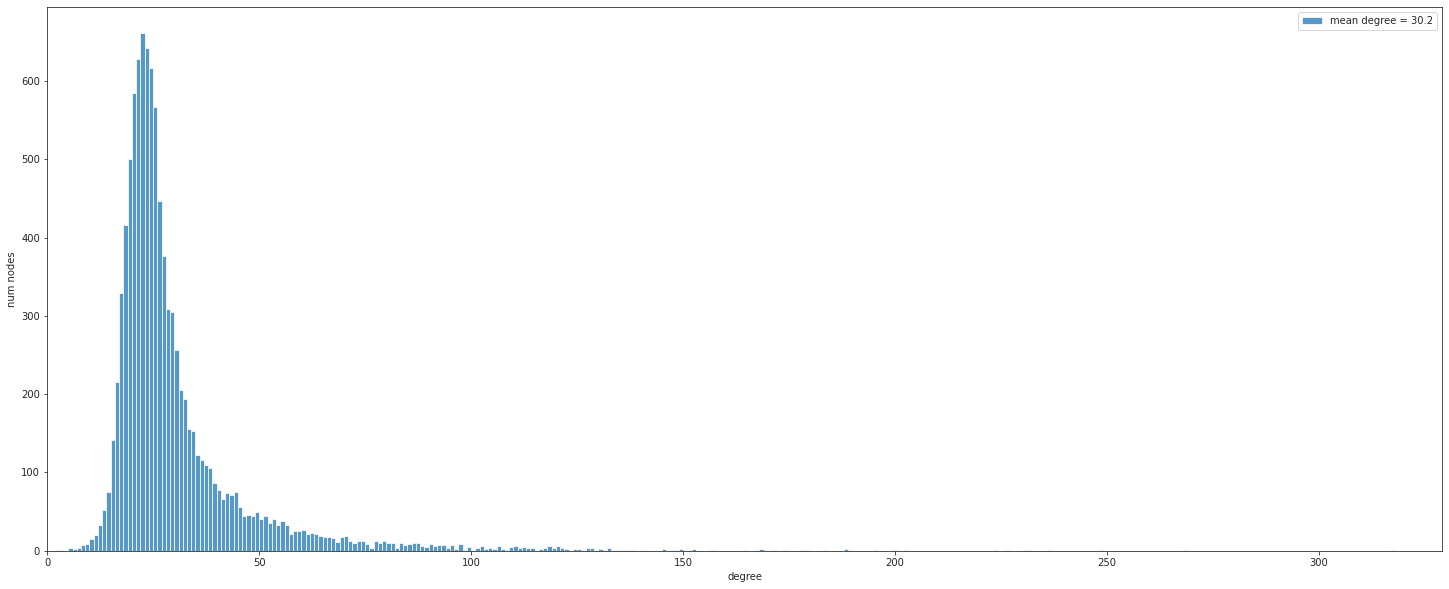

In [75]:
plot_degree_distn(G_k)

In [76]:
print(G_k.number_of_edges())

150812


t = 0.03
t = 10.01
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.00
t = 120.02
t = 130.02
t = 140.13
t = 150.01
t = 160.02
t = 170.15
t = 180.15
t = 190.53
t = 200.08
t = 210.33
t = 220.05


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


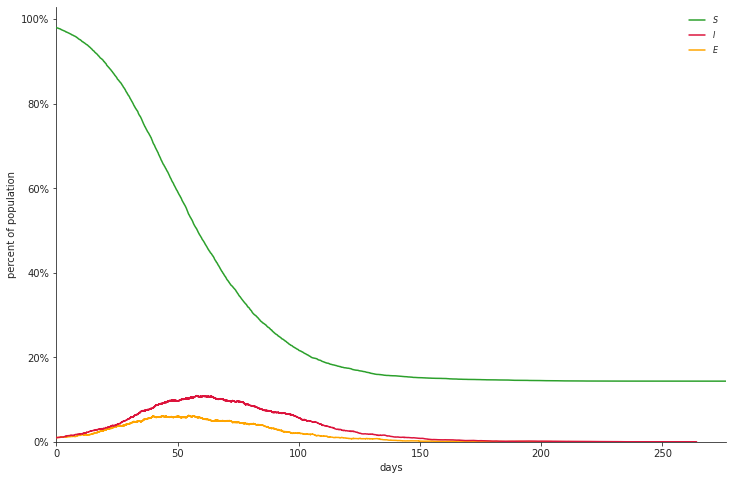

In [77]:
Loc1_res,line1 = ipfnB(G_k,e=1,i=1)

In [78]:
Loc1_res

[0.1093,
 57.88761491262227,
 0.8565,
 64.8928760963544,
 [48.82533949899772, 70.01169699114979],
 0.07341795235282536,
 0.02967803575564587]

In [72]:
distance_list_k=[]
for i in range(len(data1)):
    diff = calc_euclid(data1[3915],data1[i])
    distance_list_k.append(diff)    
hist2 = plt.hist(distance_list_k, bins = 20)

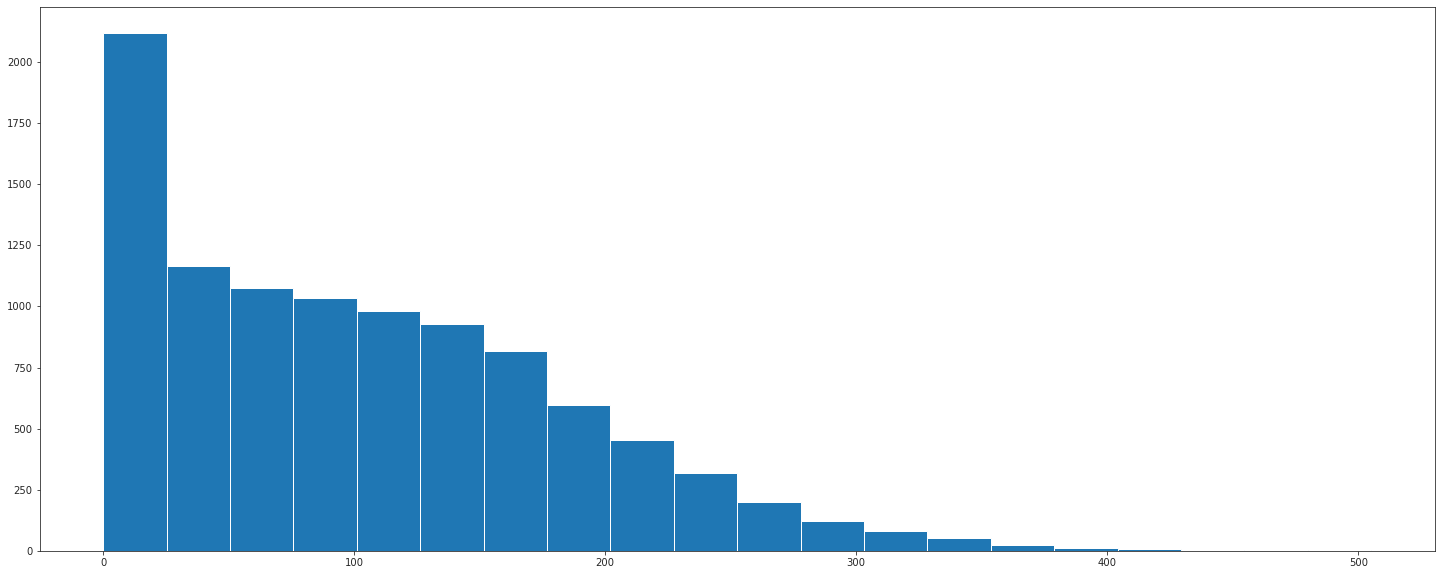

In [74]:
hist2 = plt.hist(distance_list_k, bins = 20)

In [43]:
g2  = seir.generate_scale_free_graph(10000,min_degree=12,mean_degree=30,gamma=0.2)


149491


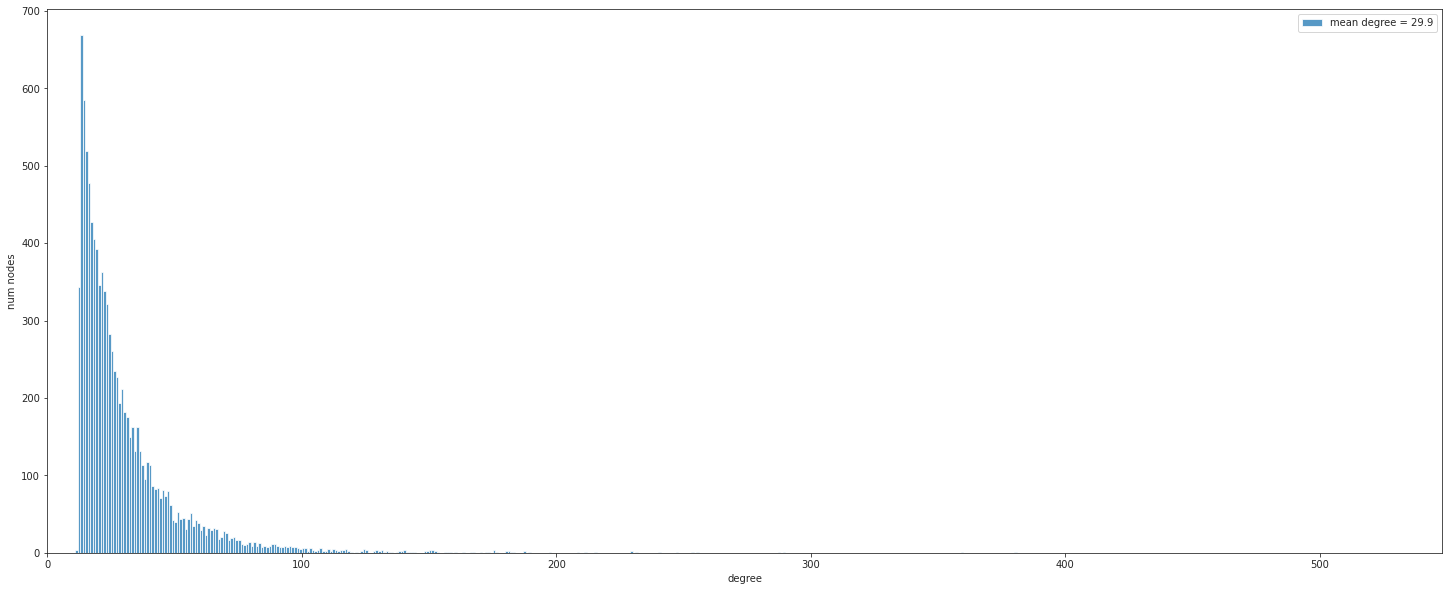

In [44]:
g2 = nx.Graph(g2)
print(g2.number_of_edges())
plot_degree_distn(g2)

t = 0.00
t = 10.00
t = 20.00
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.00
t = 110.00
t = 120.00
t = 130.06
t = 140.25
t = 150.06
t = 160.34


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


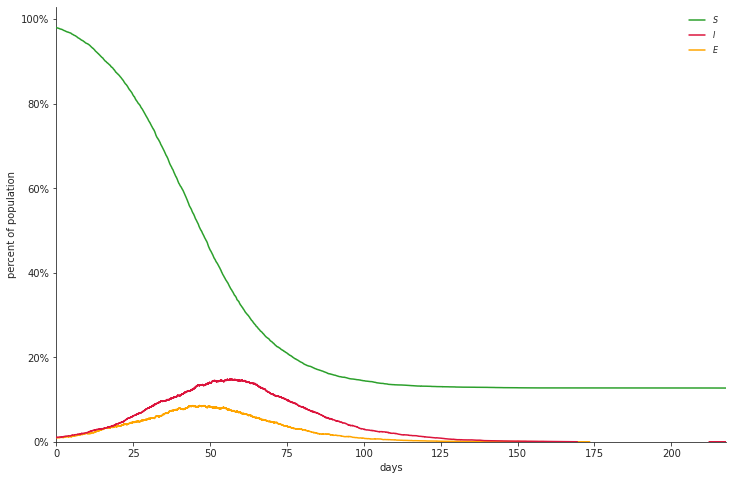

In [45]:
ofir_res,line0 = ipfnB(g2,e=1,i=1)

In [46]:
ofir_res

[0.1484,
 56.75294380161022,
 0.8728,
 44.43967702246229,
 [46.95957614723054, 65.40159341002118],
 0.09819954410230654,
 0.04148017435084698]

In [79]:
dist_list_full1=[]
existing=[]
for u,v in G_k.edges():
    if([v,u] not in existing):
        diff= calc_euclid(data1[u],data1[v])
        dist_list_full1.append(diff)
        existing.append([u,v])

In [80]:
dist_list_full0=[]
existing=[]
for u,v in g2.edges():
    if([v,u] not in existing):
        diff= calc_euclid(data1[u],data1[v])
        dist_list_full0.append(diff)
        existing.append([u,v])

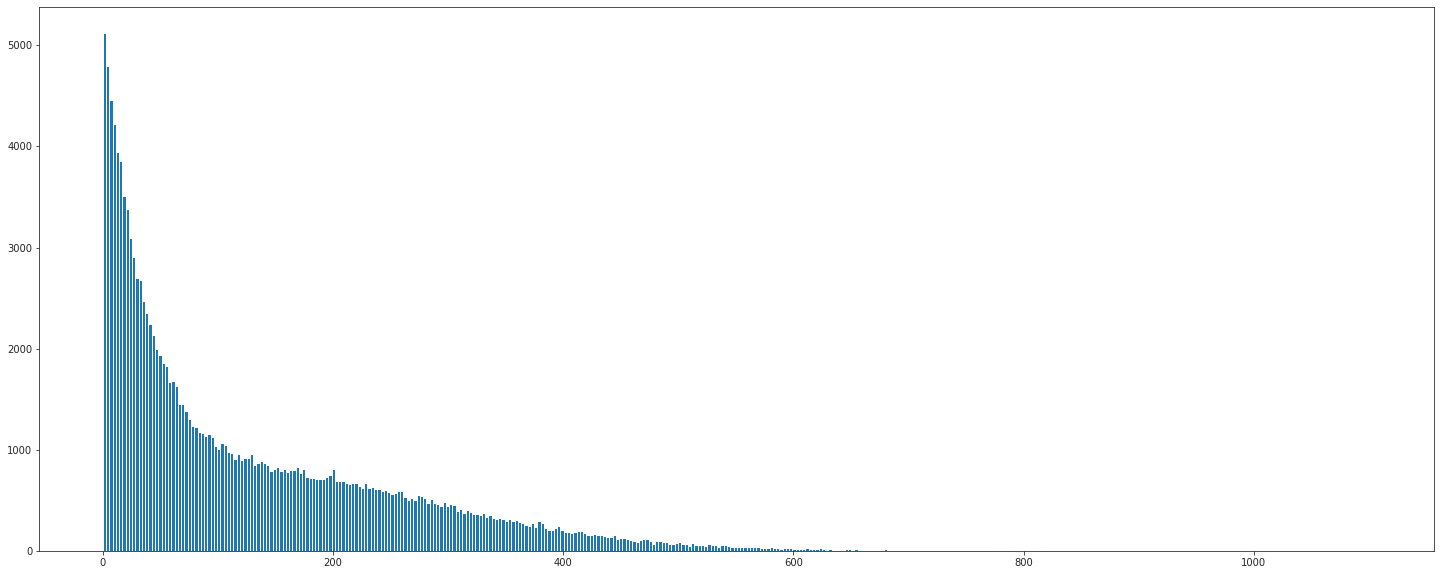

In [81]:
hist0 = plt.hist(dist_list_full0, bins = 388)

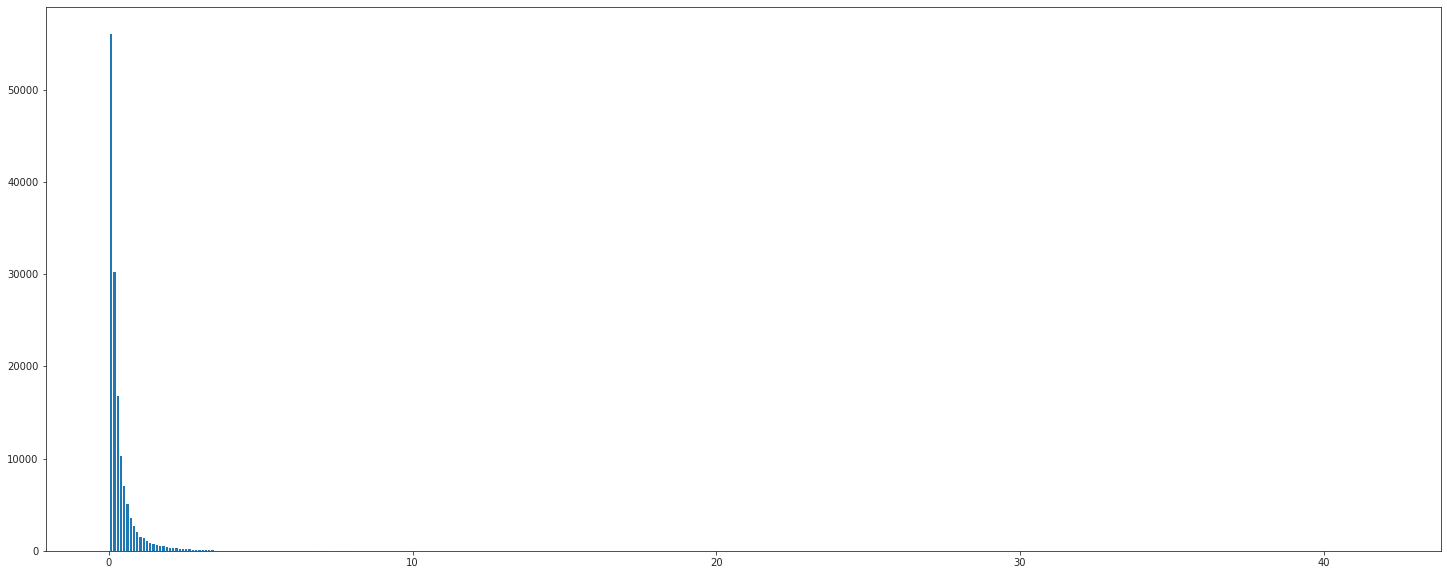

In [82]:
hist1 = plt.hist(dist_list_full1, bins = 388)

In [107]:
vals=[]
for i in G_k.degree:
    vals.append(i[1])
max(vals)

329

### Location Approach 2: Fixed Radius

In [79]:
G_dist_s=nx.Graph()
G_dist_s.add_nodes_from(range(10000))
for i in range(10000):
    dlist=[]
    lim=0
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        if(diff<3 and diff!=0 and lim!=deg[i]):
            dlist.append((i,j))
            lim+=1
    G_dist_s.add_edges_from(dlist)

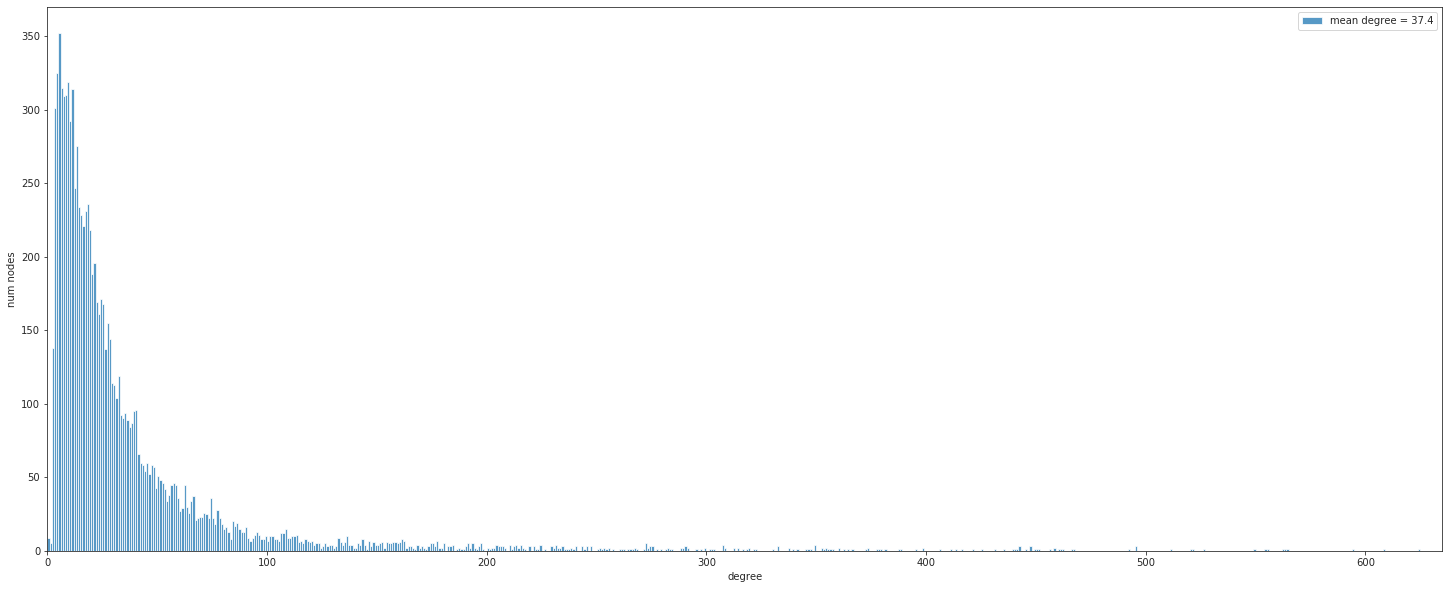

In [80]:
plot_degree_distn(G_dist_s)

In [81]:
print(G_dist_s.number_of_edges())

186836


t = 0.01
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.02
t = 120.01
t = 130.03
t = 140.16
t = 150.04
t = 160.14
t = 170.12
t = 190.04


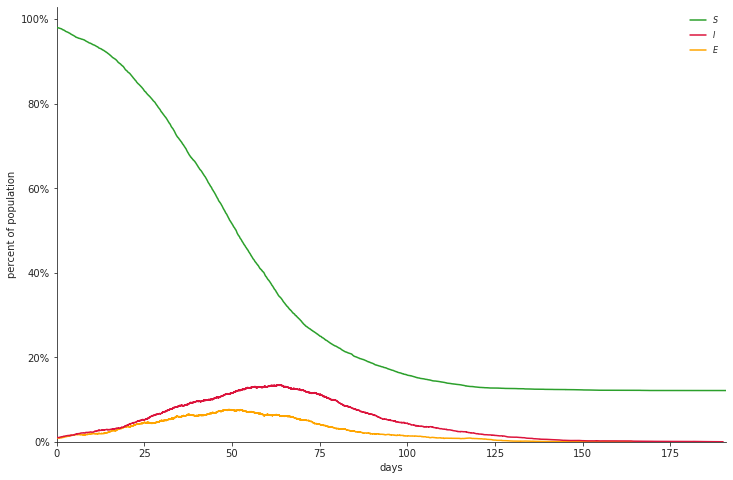

In [82]:
Loc2_res = ipfnB(G_dist_s,s=1000)

In [83]:
Loc2_res

[0.1351,
 63.153235414272686,
 0.8787,
 53.04479644132027,
 [51.97804545319671, 70.08584785997463],
 0.08814702428916772,
 0.03686846136819701]

In [88]:
G_dist_s1=nx.Graph()
G_dist_s1.add_nodes_from(range(10000))
for i in range(10000):
    dlist=[]
    lim=0
    lim1=0
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        if(diff<3 and diff!=0 and lim<(2*deg[i]/3)):
            dlist.append((i,j))
            lim+=1
        elif(diff<5 and diff!=0 and lim1<(deg[i]/3)):
            dlist.append((i,j))
            lim1+=1
    G_dist_s1.add_edges_from(dlist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

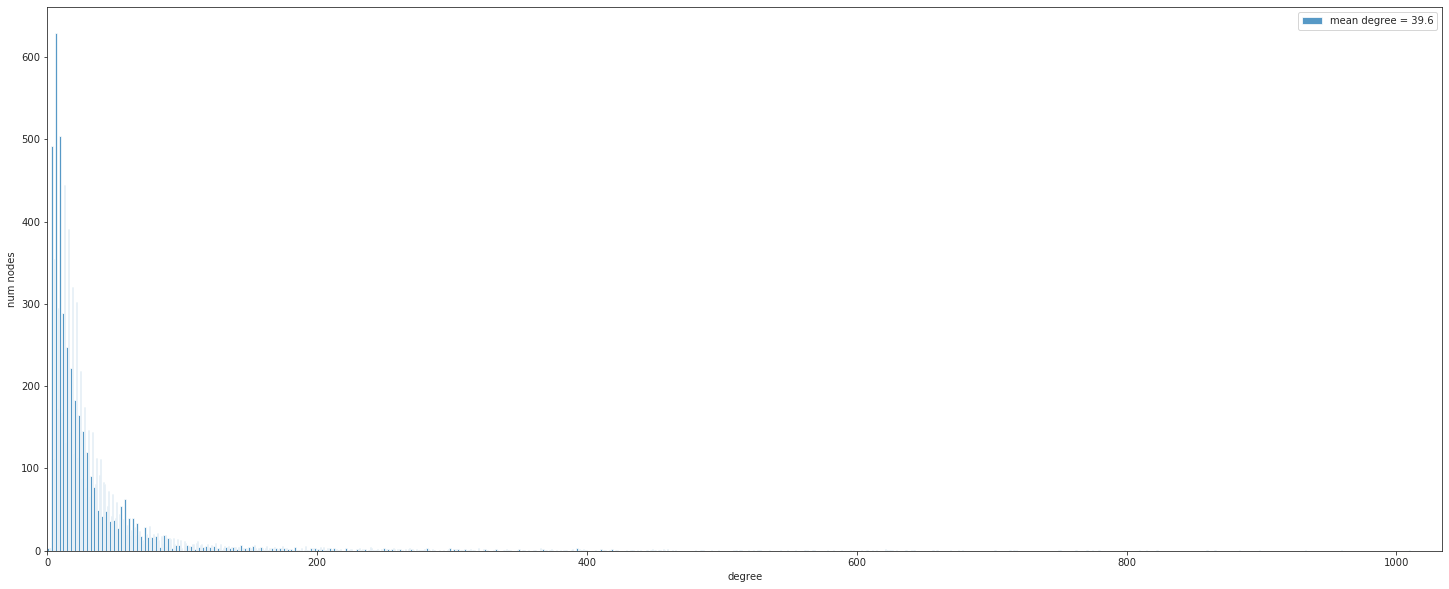

In [89]:
plot_degree_distn(G_dist_s1)

In [90]:
print(G_dist_s1.number_of_edges())

197883


In [136]:
Loc21_res = ipfnB(G_dist_s1,s=100)

NameError: name 'G_dist_s1' is not defined

In [92]:
Loc21_res

[0.1353,
 52.024019797686485,
 0.8859,
 30.561733326012586,
 [45.91116851001905, 62.75319921529312],
 0.09022372036381626,
 0.03607103067928813]

In [135]:
len(dist_list_full1)

300481

In [70]:
dist_list_full1=[]
for u,v in G_k.edges():
    diff= calc_euclid(data1[u],data1[v])
    dist_list_full1.append(diff)

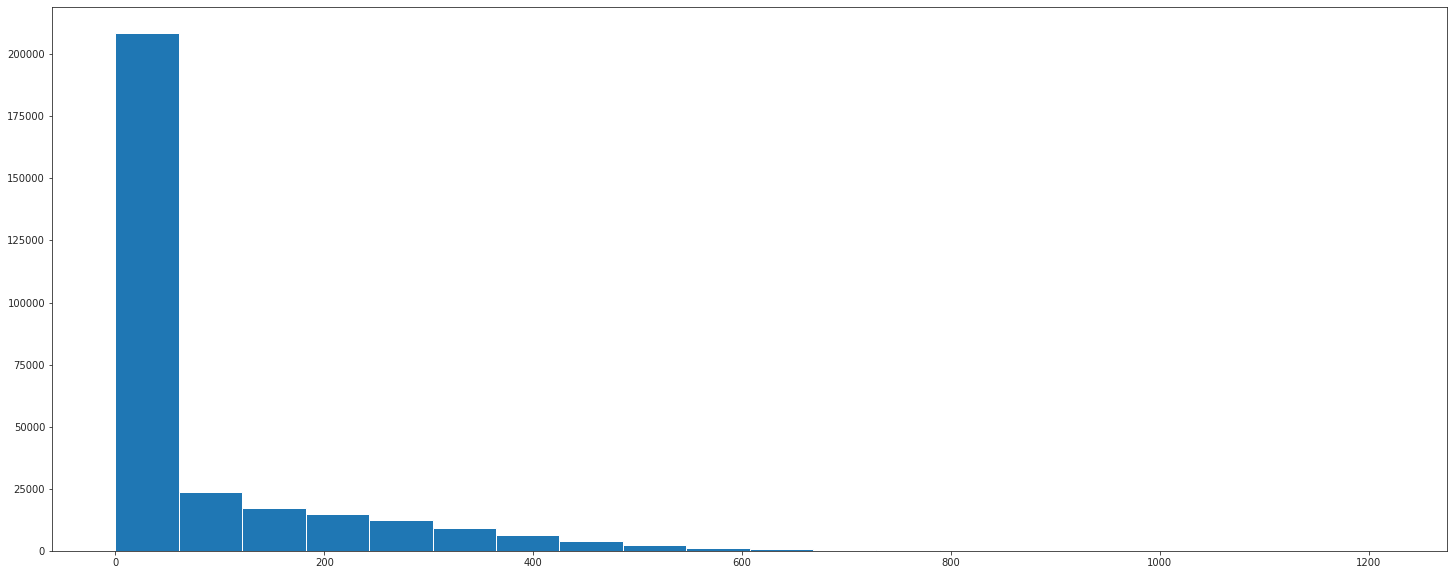

In [80]:
hist1 = plt.hist(dist_list_full1, bins = 20)

In [126]:
pos = nx.random_layout(g2)
data=[]
for i in range(len(pos)):
    data.append(pos[i].tolist())
data = np.asarray(data)


In [129]:
dist_list_full0=[]
for u,v in g2.edges():
    diff= calc_euclid(data1[u],data1[v])
    dist_list_full0.append(diff)

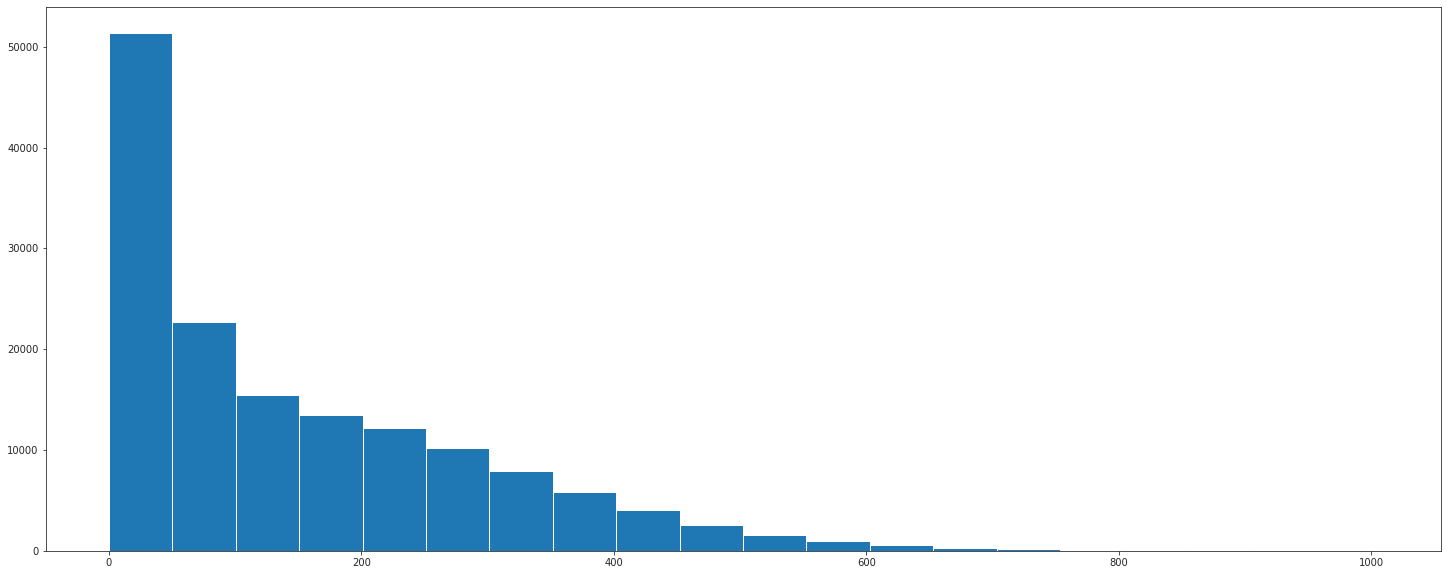

In [130]:
hist0 = plt.hist(dist_list_full0, bins = 20)

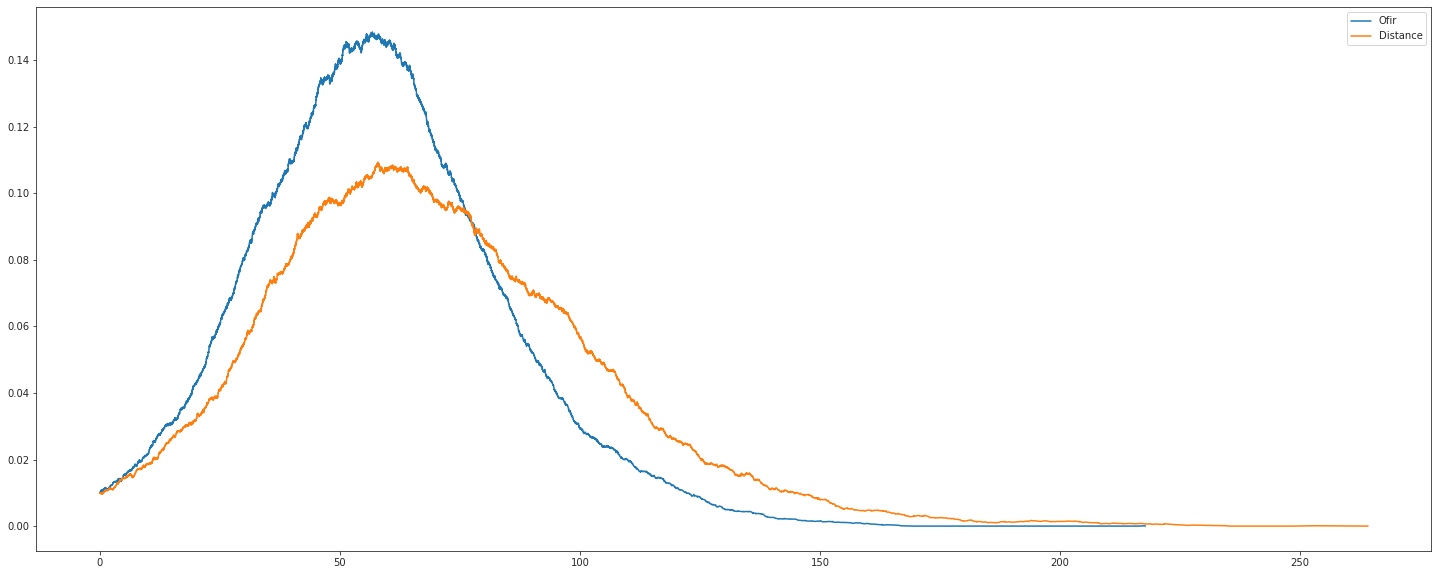

In [83]:
x0 = line0[0].compressed()
y0 = line0[1].compressed()
plt.plot(x0, y0, label = "Ofir")

x1 = line1[0].compressed()
y1 = line1[1].compressed()
plt.plot(x1, y1, label = "Distance")

plt.legend()
plt.show()

In [110]:
g2.degree

DegreeView({0: 14, 1: 13, 2: 69, 3: 25, 4: 27, 5: 38, 6: 37, 7: 19, 8: 58, 9: 23, 10: 19, 11: 16, 12: 17, 13: 33, 14: 20, 15: 24, 16: 14, 17: 86, 18: 17, 19: 13, 20: 50, 21: 45, 22: 21, 23: 73, 24: 26, 25: 32, 26: 17, 27: 16, 28: 17, 29: 131, 30: 36, 31: 23, 32: 25, 33: 22, 34: 14, 35: 21, 36: 22, 37: 19, 38: 12, 39: 30, 40: 43, 41: 23, 42: 16, 43: 25, 44: 59, 45: 15, 46: 12, 47: 25, 48: 18, 49: 27, 50: 13, 51: 49, 52: 45, 53: 20, 54: 14, 55: 12, 56: 28, 57: 37, 58: 15, 59: 16, 60: 22, 61: 33, 62: 29, 63: 28, 64: 26, 65: 14, 66: 49, 67: 37, 68: 13, 69: 13, 70: 18, 71: 21, 72: 29, 73: 70, 74: 60, 75: 16, 76: 31, 77: 28, 78: 12, 79: 59, 80: 14, 81: 22, 82: 14, 83: 98, 84: 16, 85: 13, 86: 18, 87: 21, 88: 29, 89: 56, 90: 23, 91: 14, 92: 40, 93: 32, 94: 22, 95: 37, 96: 29, 97: 23, 98: 12, 99: 16, 100: 17, 101: 35, 102: 24, 103: 19, 104: 19, 105: 14, 106: 17, 107: 21, 108: 26, 109: 13, 110: 13, 111: 27, 112: 16, 113: 13, 114: 14, 115: 79, 116: 15, 117: 18, 118: 39, 119: 39, 120: 16, 121: 16,

### Distance Node Samples: Distance distribution

7501
24


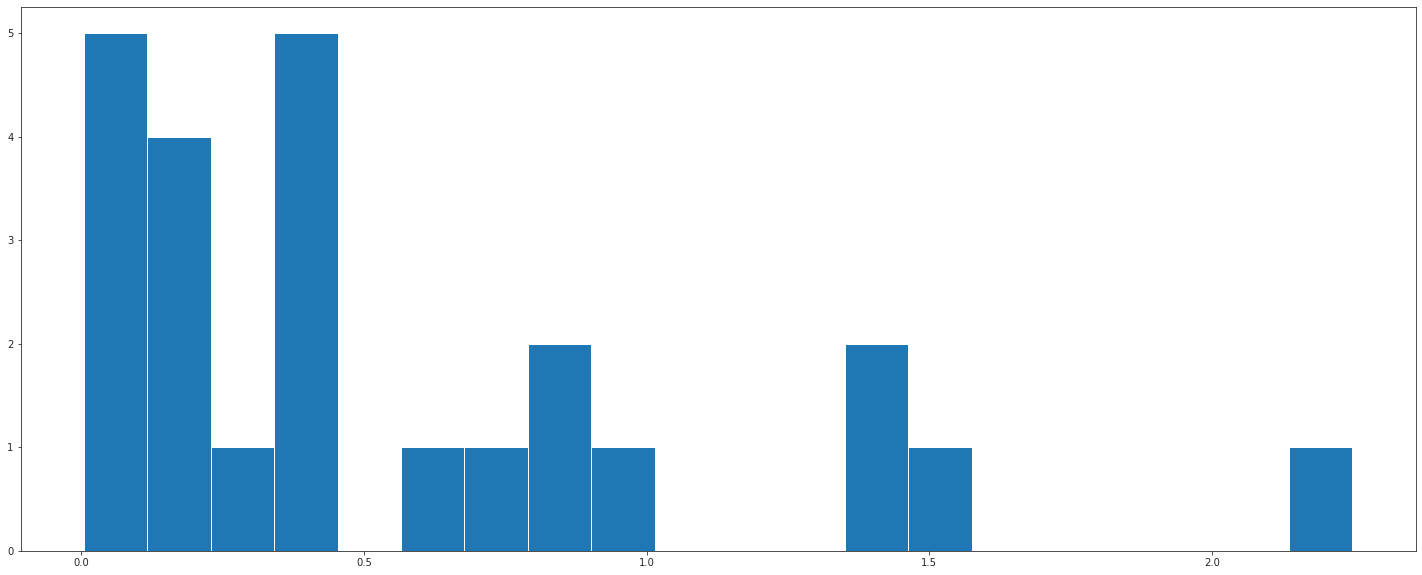

In [91]:
ind=7501
dist_list_k=[]
for u,v in G_k.edges(ind):
    diff= calc_euclid(data1[u],data1[v])
    dist_list_k.append(diff)   
print(ind)
print(G_k.degree[ind])
hist2 = plt.hist(dist_list_k,bins=20)

947
110


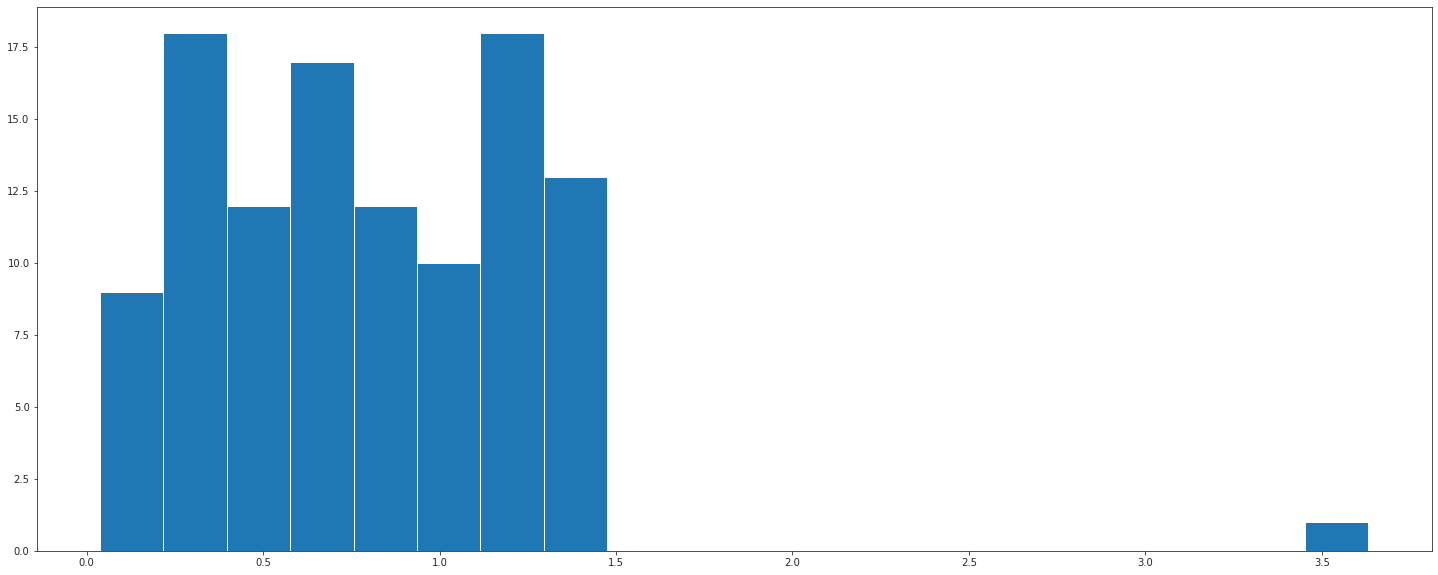

In [98]:
ind=947
dist_list_k=[]
for u,v in G_k.edges(ind):
    diff= calc_euclid(data1[u],data1[v])
    dist_list_k.append(diff)   
print(ind)
print(G_k.degree[ind])
hist2 = plt.hist(dist_list_k,bins=20)

4085
112


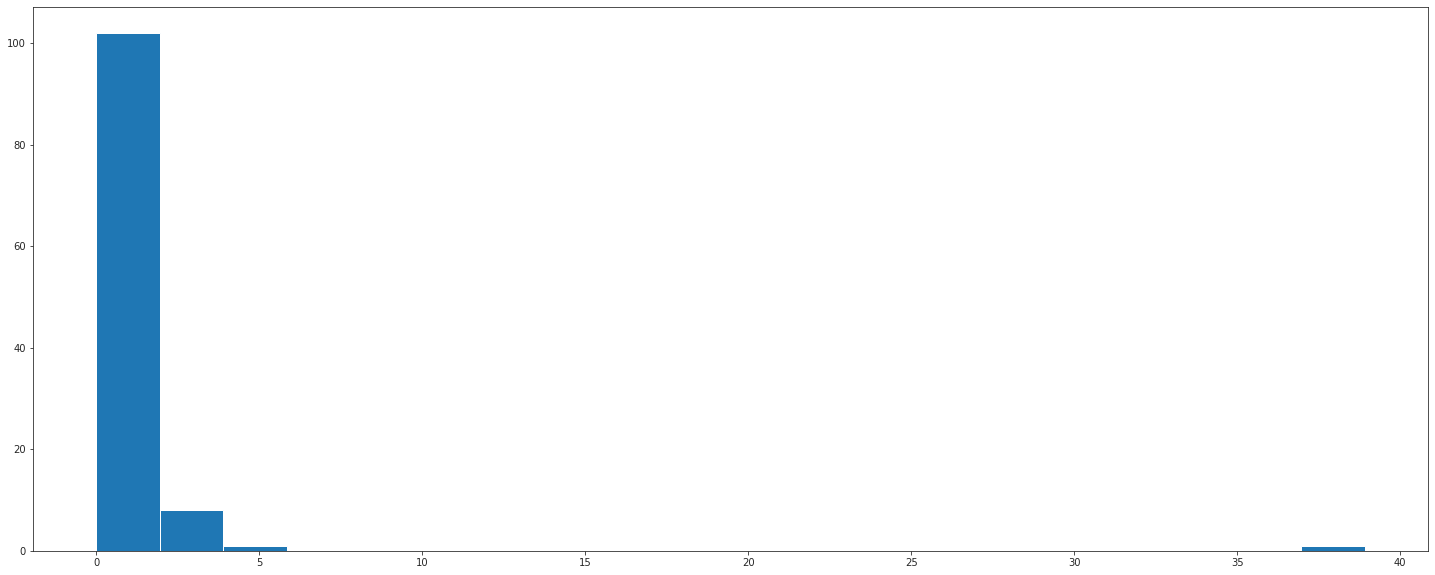

In [99]:
ind=4085
dist_list_k=[]
for u,v in G_k.edges(ind):
    diff= calc_euclid(data1[u],data1[v])
    dist_list_k.append(diff)   
print(ind)
print(G_k.degree[ind])
hist2 = plt.hist(dist_list_k,bins=20)

7164
60


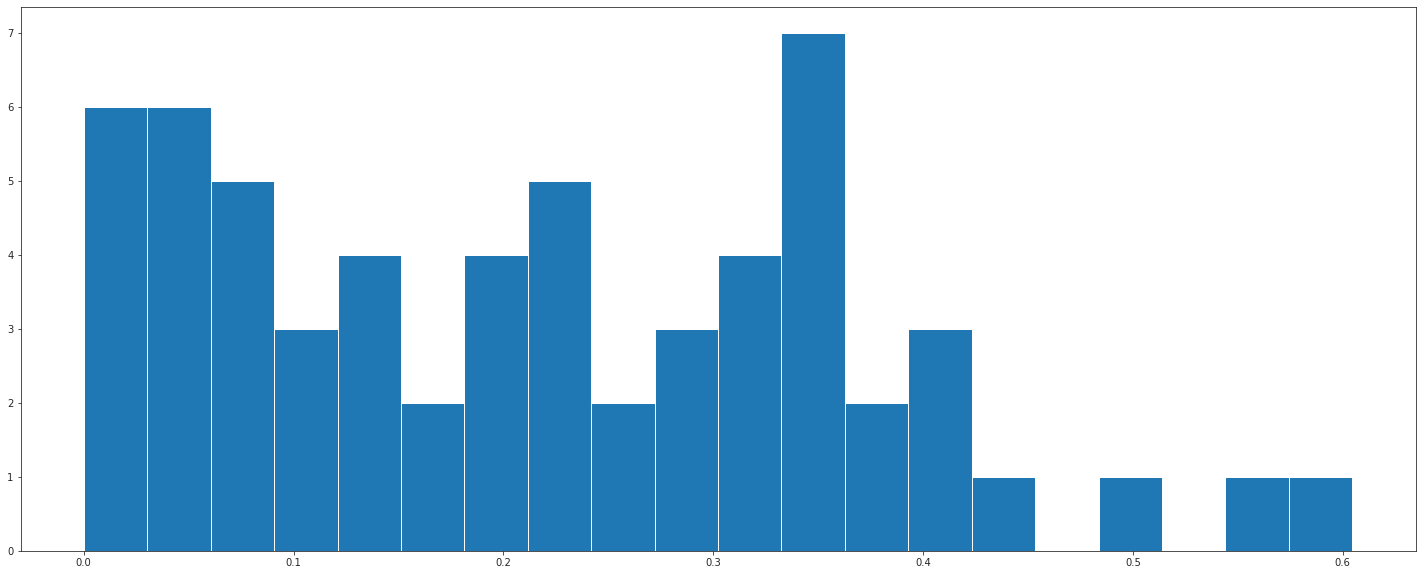

In [100]:
ind=7164
dist_list_k=[]
for u,v in G_k.edges(ind):
    diff= calc_euclid(data1[u],data1[v])
    dist_list_k.append(diff)   
print(ind)
print(G_k.degree[ind])
hist2 = plt.hist(dist_list_k,bins=20)

9080
329


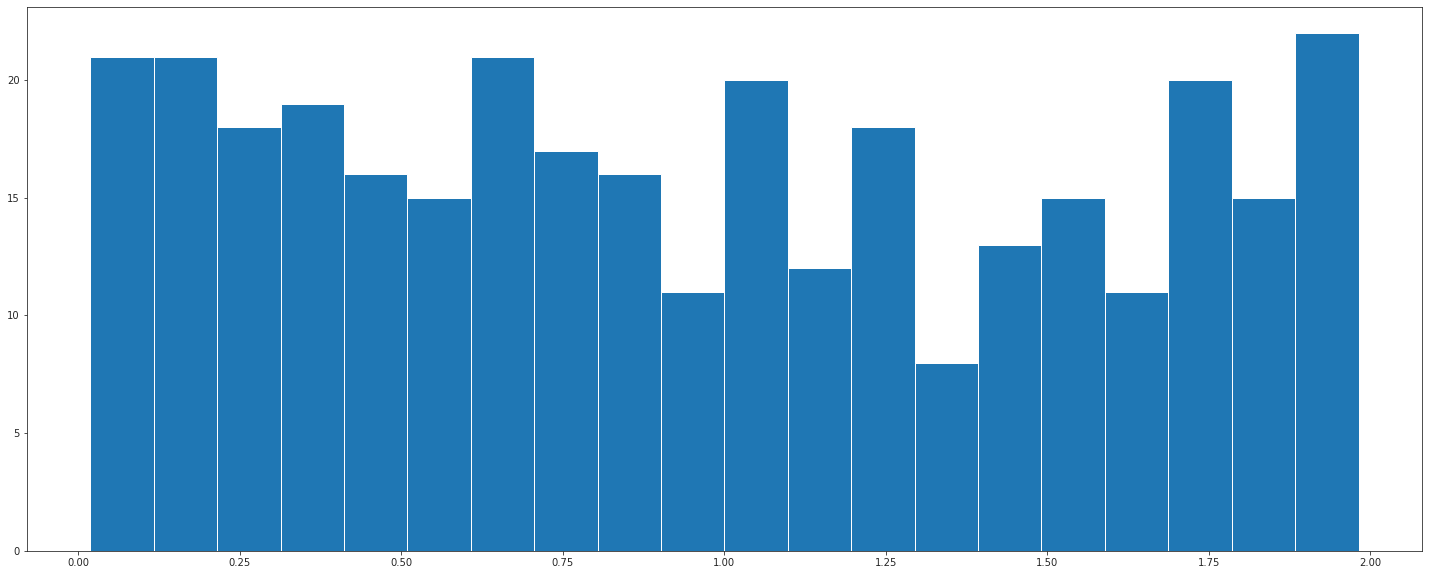

In [108]:
ind=9080
dist_list_k=[]
for u,v in G_k.edges(ind):
    diff= calc_euclid(data1[u],data1[v])
    dist_list_k.append(diff)   
print(ind)
print(G_k.degree[ind])
hist2 = plt.hist(dist_list_k,bins=20)

### Ofir Node Samples: Distance distribution

9080
24


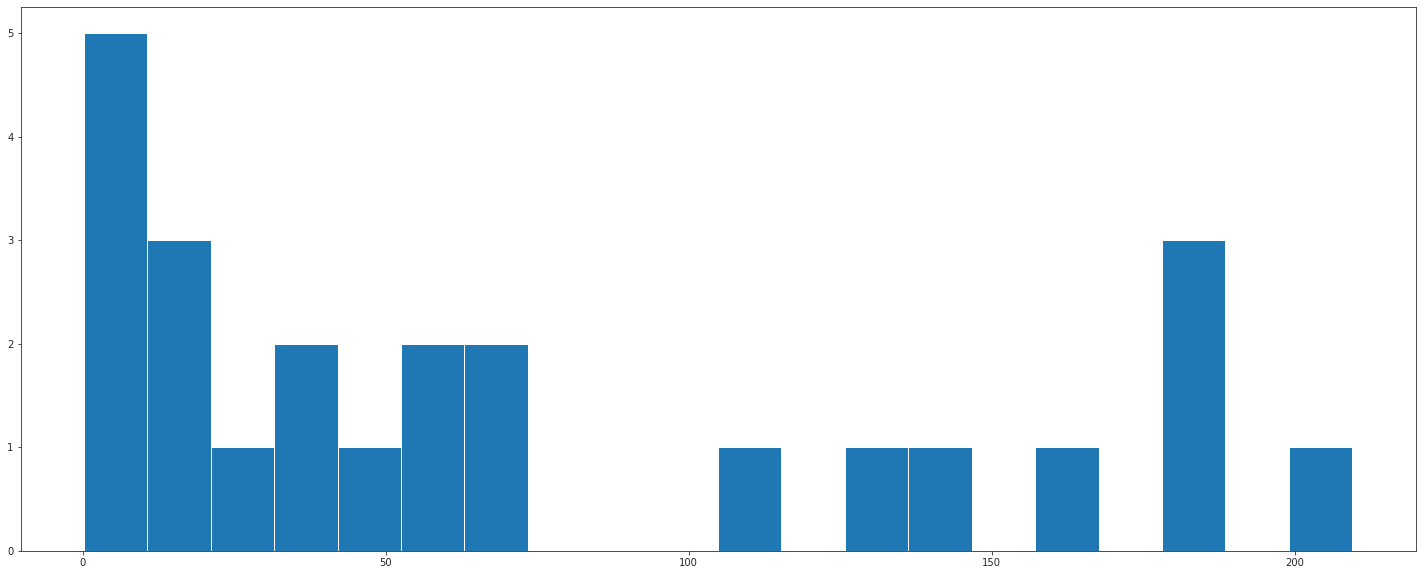

In [109]:
ind=9080
dist_list_o=[]
for u,v in g2.edges(ind):
    diff= calc_euclid(data1[u],data1[v])
    dist_list_o.append(diff)   
print(ind)
print(g2.degree[ind])
hist2 = plt.hist(dist_list_o,bins=20)

0


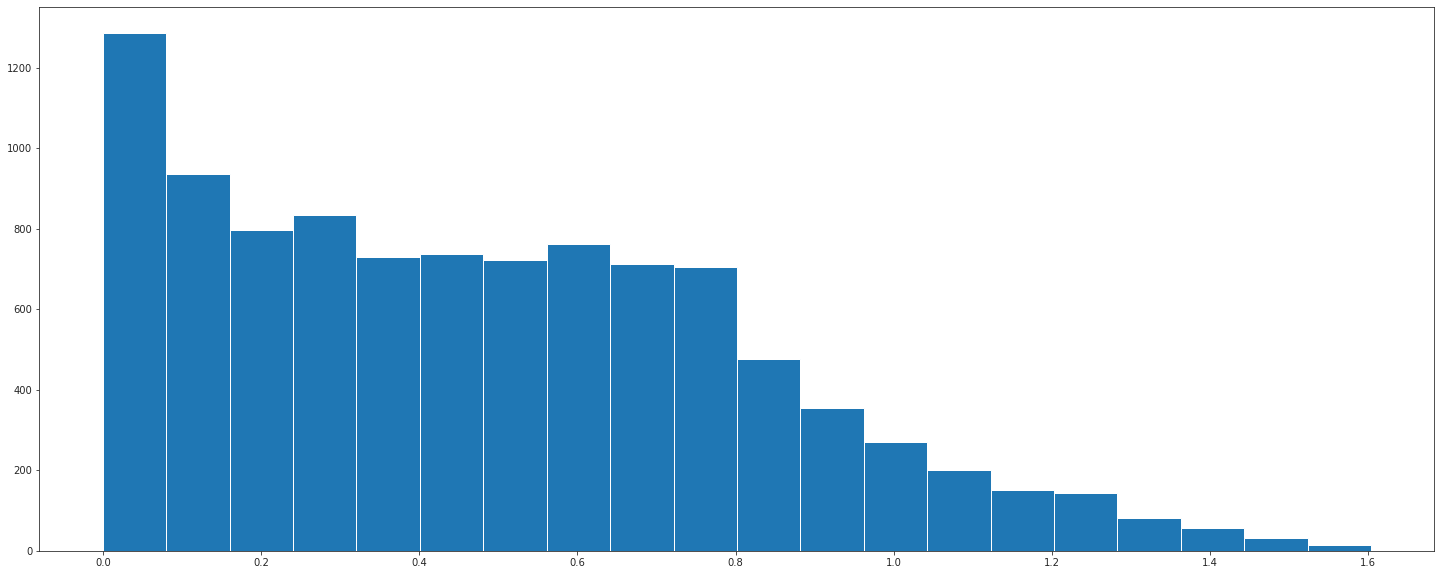

In [115]:
distance_list_o=[]
for i in range(len(data)):
    diff = calc_euclid(data[0],data[i])
    distance_list_o.append(diff) 
print(0)
hist2 = plt.hist(distance_list_o, bins = 20)

500


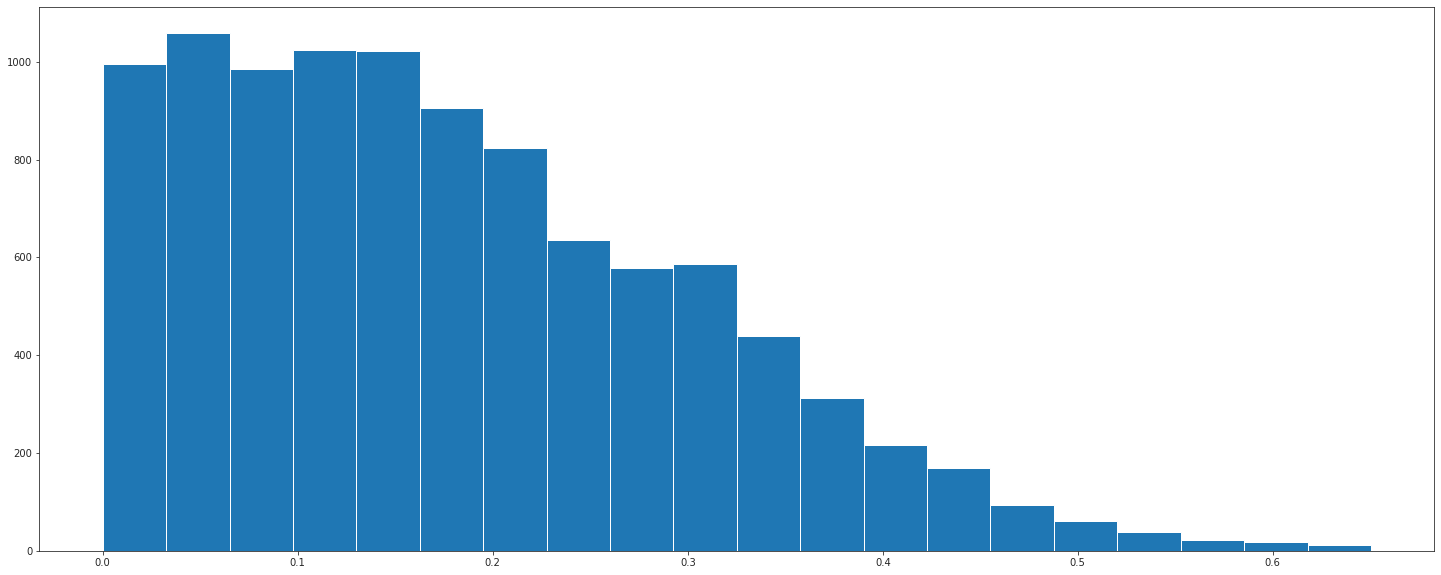

In [116]:
distance_list_o=[]
for i in range(len(data)):
    diff = calc_euclid(data[500],data[i])
    distance_list_o.append(diff) 
print(500)
hist2 = plt.hist(distance_list_o, bins = 20)

1500


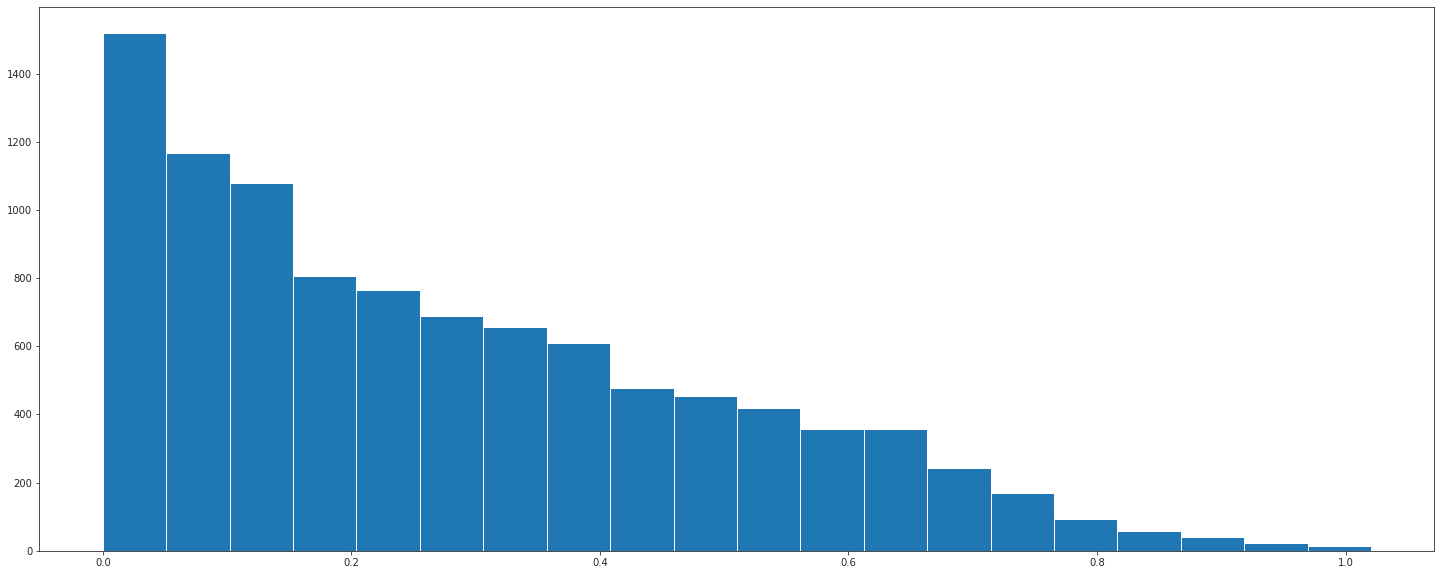

In [117]:
distance_list_o=[]
for i in range(len(data)):
    diff = calc_euclid(data[1500],data[i])
    distance_list_o.append(diff) 
print(1500)
hist2 = plt.hist(distance_list_o, bins = 20)